# Creating a Model for benchmark test
- only 3 classes pizza steak
- 100 images (75 train and 25 test)

In [ ]:
import sys
import os
import torch

sys.path.append(os.path.abspath(".."))  # Go up from notebooks/ to project root

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Importing TinyVGG

In [2]:
from models.modelclass.models import TinyVGG

model_0 = TinyVGG(
    input_layer=3,
    hidden_layer=10,
    output_layer=3)

model_0.to(device)


TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.25, inplace=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7):

# Creating the dataset


In [3]:
from pathlib import Path

data_dir = Path("./pizza_steak_sushi")
train_dir = data_dir/"train"
test_dir = data_dir/"test"

print(train_dir)
print(test_dir)

pizza_steak_sushi\train
pizza_steak_sushi\test


* creating the transform

In [4]:
from torchvision import transforms

mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    # transforms.TrivialAugmentWide(),  # Still lightweight
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


test_transform = transforms.Compose([
    transforms.Resize(size = (224 , 224)),
    transforms.ToTensor(),
    transforms.Normalize(                     # Normalize to ImageNet mean/std
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

print(f"Train transform: {train_transform}")
print(f"Test transform: {test_transform}")

Train transform: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
Test transform: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [5]:
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(
    root = train_dir,
    transform = train_transform   
)

test_dataset = ImageFolder(
    root = test_dir,
    transform = test_transform
)

print(train_dataset)
print(test_dataset)
classes = train_dataset.classes
print(classes)

Dataset ImageFolder
    Number of datapoints: 677
    Root location: pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset ImageFolder
    Number of datapoints: 192
    Root location: pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
['pizza', 'steak', 'sushi']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


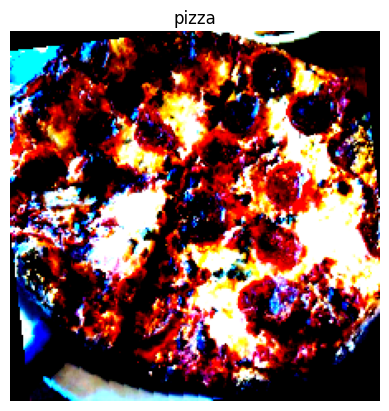

In [6]:
from helper.Visualize import plot_image

image, label = train_dataset[10]

plot_image(image, classes[label])

creating the DataLoader

In [7]:
from torch.utils.data import DataLoader

EPOCHS = 3
BATCH_SIZE = 32


train_dataloader = DataLoader(
    dataset = train_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 0,
    shuffle = True,
    pin_memory = True
)

test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 0,
    shuffle = False,
    pin_memory = True
)

In [8]:
print(train_dataloader)
print(test_dataloader)

image, label = next(iter(train_dataloader))
print(image.shape)

torch.Size([32, 3, 224, 224])


# Training the model

In [9]:
from torchinfo import summary

summary(model = model_0 , input_size=(32, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 112, 112]        --
│    └─Conv2d: 2-1                       [32, 10, 224, 224]        280
│    └─BatchNorm2d: 2-2                  [32, 10, 224, 224]        20
│    └─ReLU: 2-3                         [32, 10, 224, 224]        --
│    └─Conv2d: 2-4                       [32, 10, 224, 224]        910
│    └─BatchNorm2d: 2-5                  [32, 10, 224, 224]        20
│    └─ReLU: 2-6                         [32, 10, 224, 224]        --
│    └─MaxPool2d: 2-7                    [32, 10, 112, 112]        --
│    └─Dropout2d: 2-8                    [32, 10, 112, 112]        --
├─Sequential: 1-2                        [32, 10, 56, 56]          --
│    └─Conv2d: 2-9                       [32, 10, 112, 112]        910
│    └─BatchNorm2d: 2-10                 [32, 10, 112, 112]        20
│    └─ReLU:

In [10]:
from torch.optim import Adam
from torch import nn

optimizer = Adam(model_0.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5) # type: ignore


In [11]:
from helper.Process import run_train_test

results = run_train_test(
    model = model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    scheduler=scheduler,
    device= torch.device(device),
    epochs=30
)


  0%|          | 0/30 [00:00<?, ?it/s]

d:\FoodNet\mlvenv\Lib\site-packages\torch\optim\lr_scheduler.py:198: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch:0	Train Loss:4.6951	Train Acc:0.4236	Test Loss:5.1780	Test Acc:0.4635
Epoch:1	Train Loss:2.3581	Train Acc:0.5301	Test Loss:2.4197	Test Acc:0.5781
Epoch:2	Train Loss:1.7793	Train Acc:0.5386	Test Loss:2.6526	Test Acc:0.4531
Epoch:3	Train Loss:2.5034	Train Acc:0.4946	Test Loss:2.0484	Test Acc:0.5469
Epoch:4	Train Loss:1.7374	Train Acc:0.5741	Test Loss:1.3704	Test Acc:0.5938
Epoch:5	Train Loss:1.0250	Train Acc:0.6486	Test Loss:1.7235	Test Acc:0.4896
Epoch:6	Train Loss:0.9359	Train Acc:0.6190	Test Loss:1.0593	Test Acc:0.5365
Epoch:7	Train Loss:0.8563	Train Acc:0.6332	Test Loss:1.2930	Test Acc:0.5260
Epoch:8	Train Loss:1.1663	Train Acc:0.5707	Test Loss:0.9249	Test Acc:0.6094
Epoch:9	Train Loss:0.8926	Train Acc:0.6381	Test Loss:1.2139	Test Acc:0.5104
Epoch:10	Train Loss:1.1849	Train Acc:0.6020	Test Loss:1.2140	Test Acc:0.5677
Epoch:11	Train Loss:1.0269	Train Acc:0.6074	Test Loss:1.3251	Test Acc:0.5469
Epoch:12	Train Loss:0.9939	Train Acc:0.6148	Test Loss:1.1352	Test Acc:0.6198
Epoch:13	

{'train_loss': [4.695054894143885, 2.3581197315996345, 1.7792770320718938, 2.5034325556321577, 1.737366573377089, 1.0250045142390511, 0.9359245950525458, 0.8563406873833049, 1.1662922501564026, 0.8925785422325134, 1.184892250732942, 1.0268991779197345, 0.9938626235181635, 0.8522511287169023, 0.8327438181096857, 0.7900489311326634, 0.8334508998827501, 0.7165318524295633, 0.7142343670129776, 0.7052209350195798, 0.868758808482777, 0.8128254765814001, 0.9723065536130558, 0.9390757002613761, 0.815343904224309, 0.6979051950302991, 0.6918166117234663, 0.6441804421218958, 0.7150537195530805, 0.6462335396896709], 'train_acc': [0.42357954545454546, 0.5301136363636364, 0.5386363636363636, 0.4946022727272727, 0.5741477272727272, 0.6485795454545454, 0.6190340909090909, 0.6332386363636364, 0.5707386363636364, 0.6380681818181818, 0.6019886363636364, 0.6073863636363637, 0.6147727272727272, 0.6579545454545455, 0.6715909090909091, 0.6659090909090909, 0.6579545454545455, 0.7139204545454546, 0.71761363636

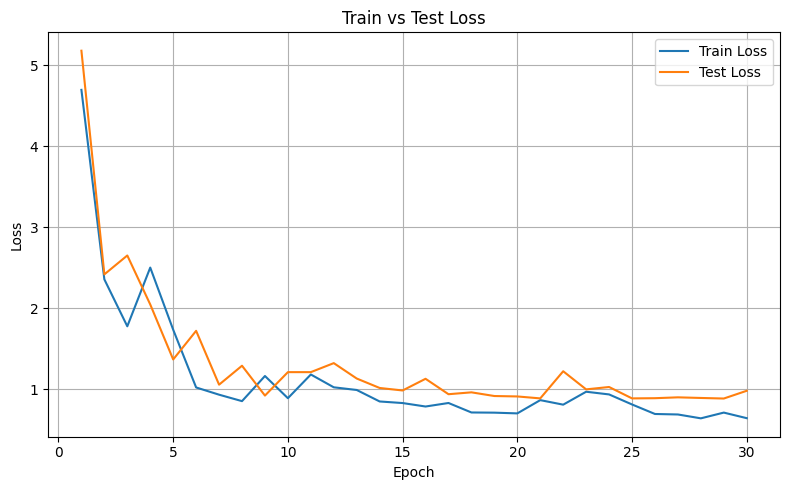

In [12]:
from helper.Visualize import plot_train_vs_test_loss

print(results)
plot_train_vs_test_loss(results)

In [13]:
def get_model_final_result(result: dict[str ,float])->dict[str, float]:
    model_result = {}
    
    for i in result:
        if i == "time":
            model_result[i] = result[i]
        else:
            model_result[i] = result[i][-1]

    return model_result

model_0_final_results =  get_model_final_result(results)
model_0_final_results

{'train_loss': 0.6462335396896709,
 'train_acc': 0.7161931818181818,
 'test_loss': 0.984115719795227,
 'test_acc': 0.640625,
 'time': 275.7062976360321}

In [14]:
sum(p.numel() for p in model_0.parameters())

97173

# Making some predictions

In [ ]:
import time


def make_prediction(model: torch.nn.Module, data: tuple, classes: list, device: torch.device):
    """
    Makes a prediction on the given model and data
    Args:
        model: PyTorch model to make prediction
        data: tuple that stores (image tensor, label)
        classes: list containing all the clases
        device: device in which model and tensors are running
    """

    device = torch.device(device)
    model.to(device)

    with torch.inference_mode():
        start = time.time()
        image, label = data
        image = image.unsqueeze(0).to(device)
        
        y_pred_logits = model(image)
        y_pred_probs = torch.softmax(y_pred_logits, dim=1)
        y_pred_class = torch.argmax(y_pred_probs , dim=1)
        end = time.time()
        inference_time = round((end - start) * 1000, 3)

        confidences = {}
        for i, prob in enumerate(y_pred_probs[0].cpu().numpy()):
            confidences[classes[i]] = round(float(prob) * 100, 3)

        return classes[int(y_pred_class.item())], confidences, inference_time
    

# data = train_dataset[80]

# prediction, confidence, inference_time = make_prediction(model_0, data, classes, torch.device(device))
# print(prediction)
# print(confidence)
# print(inference_time)
# plot_image(data[0], classes[data[1]])

correct = 0
wrong = 0
inf_time = 0
for data in test_dataset:
    prediction, conf, inf = make_prediction(model_0, data, classes, torch.device(device))

    if prediction == classes[data[1]]:
        correct += 1
    else:
        wrong += 1
    
    inf_time +=inf

print(f"correct: {correct}")
print(f"Incorrect: {wrong}")
print(f"average inference time: {inf_time/(correct+wrong)}")




correct: 123
Incorrect: 69
average inference time: 2.955270833333334


# Creating a function to save model

In [60]:
def save_model(model: torch.nn.Module,  metadata: dict, name: str, loc: Path, device: torch.device):
    """
        Saves the model into the desired location along with its metadata
        Args:
            model: model to be saved
            metadata: dictionary that saves relevant info about the mode such as {train acc, training images, no. of parameters}
            name: name of the file
            loc: location to save the file
    """
    model.to(device)
    metadata["model_state_dict"] = model.state_dict()
    save_path = loc/f"{name}.pt"

    torch.save(metadata, save_path)
    print(f"model saved at {save_path}")

In [61]:
data = {
    "train accuracy": round(results["train_acc"][-1]*100, 2),
    "training images":len(train_dataset),
    "parameters":sum(p.numel() for p in model_0.parameters())
}
loc = Path("../models")

save_model(model=model_0 , metadata=data, name="pizza_steak_sushi.pth", loc=loc, device=torch.device(device))

model saved at ..\models\pizza_steak_sushi.pth.pt


# Creating a function to load the model

In [63]:
def load_model(model: torch.nn.Module, checkpoint_path: Path, device: torch.device) -> dict:
    """
    Loads a saved model checkpoint (weights + metadata).

    Args:
        model (torch.nn.Module): An *uninitialized* model instance with the same architecture.
        checkpoint_path (Path): Full path to the `.pt` file.
        device (torch.device): Device to map model and data to (e.g. 'cpu' or 'cuda').

    Returns:
        dict: Metadata dictionary containing training details, metrics, etc.
    """
    if not checkpoint_path.exists():
        raise FileNotFoundError(f"No checkpoint found at {checkpoint_path}")

    checkpoint = torch.load(checkpoint_path, map_location=device)

    # Load model weights
    model.load_state_dict(checkpoint["model_state_dict"])
    model.to(device)
    model.eval()  # Set to evaluation mode

    print(f"[INFO] Model loaded from {checkpoint_path}")

    # Remove state dict from metadata for clarity
    metadata = {k: v for k, v in checkpoint.items() if k != "model_state_dict"}
    return metadata


* Loading the model was a success

In [64]:
model_1 = TinyVGG(3, 10, 3)
metadata = load_model(model_1, loc/"pizza_steak_sushi.pth.pt", torch.device(device))
metadata

[INFO] Model loaded from ..\models\pizza_steak_sushi.pth.pt


{'train accuracy': 71.62, 'training images': 677, 'parameters': 97173}